In [26]:
import time

import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from toolsets.file_io import get_file_list, split_file_list
from toolsets.ff_droup import process_mzml, get_EIC_list, EIC, feature_finding, get_mz_bin, get_peaks, get_edges, find_most_close, connect_peaks, moving_average, get_centroid, get_feature, get_ms1_feature, get_istd_info, get_istd_info_all
from toolsets.search import string_search, quick_search_values, quick_search_sorted
from skimage.restoration import denoise_wavelet
import seaborn as sns
import matplotlib.pyplot as plt
from pybaselines import utils
import pybaselines
import toolsets.spectra_operations as so
# eic_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom/EICs_snip_baseline_estimate'
from tqdm import tqdm
from scipy.fft import fft, ifft
mzml_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom/HILIC pos mode mzml'
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/gut_microbiom'
file_list = get_file_list(mzml_dir, '.mzML', with_tail=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
samples, qcs, blks = split_file_list(file_list)

In [6]:
ms1, ms2 = process_mzml(qcs[0], parent_dir=mzml_dir, rt_max=5)

In [96]:
ms2

,scan_idx,cycle,ms_level,precursor_mz,charge,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
0,1532,510,2,84.044535,1,2.179297,70.03838348388672\t2118.0224609375\n84.0445175...,"(83.544532775879, 84.544532775879)",84.044571,2.174278,3.122020e+06,0.948551,0.000036,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1,1693,564,2,84.080942,1,2.408015,67.05448913574219\t8925.4775390625\n82.0649490...,"(83.580940246582, 84.580940246582)",84.080986,2.405820,1.665078e+06,0.905353,0.000044,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
2,1121,373,2,84.911423,1,1.607826,66.1156005859375\t12224.4501953125\n68.1296615...,"(84.411422729492, 85.411422729492)",84.911430,1.603982,9.098159e+05,0.945485,0.000008,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
3,788,262,2,85.132378,1,1.130146,66.10527038574219\t27666.376953125\n66.1068420...,"(84.632377624512, 85.632377624512)",85.132362,1.126835,9.730859e+06,0.956717,0.000015,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
4,818,272,2,85.132362,1,1.170141,64.92672729492188\t35700.0\n66.1048812866211\t...,"(84.632362365723, 85.632362365723)",85.132370,1.167083,4.567197e+07,0.947367,0.000008,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,137,45,2,790.380167,1,0.213685,61.02862548828125\t34443.98046875\n69.03365325...,"(789.880187988281, 790.880187988281)",790.380493,0.210337,1.836062e+07,1.000000,0.000327,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1724,187,62,2,817.582926,1,0.276779,64.02779388427734\t87841.9921875\n77.122894287...,"(817.082946777344, 818.082946777344)",817.582947,0.274555,1.381094e+08,0.997949,0.000021,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1725,293,97,2,817.583493,1,0.423090,67.0545425415039\t11491.2685546875\n77.3665542...,"(817.08349609375, 818.08349609375)",817.583313,0.419844,1.003972e+07,1.000000,0.000180,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1726,188,62,2,834.609487,1,0.277456,69.23934173583984\t86629.6953125\n86.682929992...,"(834.109497070313, 835.109497070313)",834.609375,0.274555,1.240460e+08,0.993788,0.000112,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML


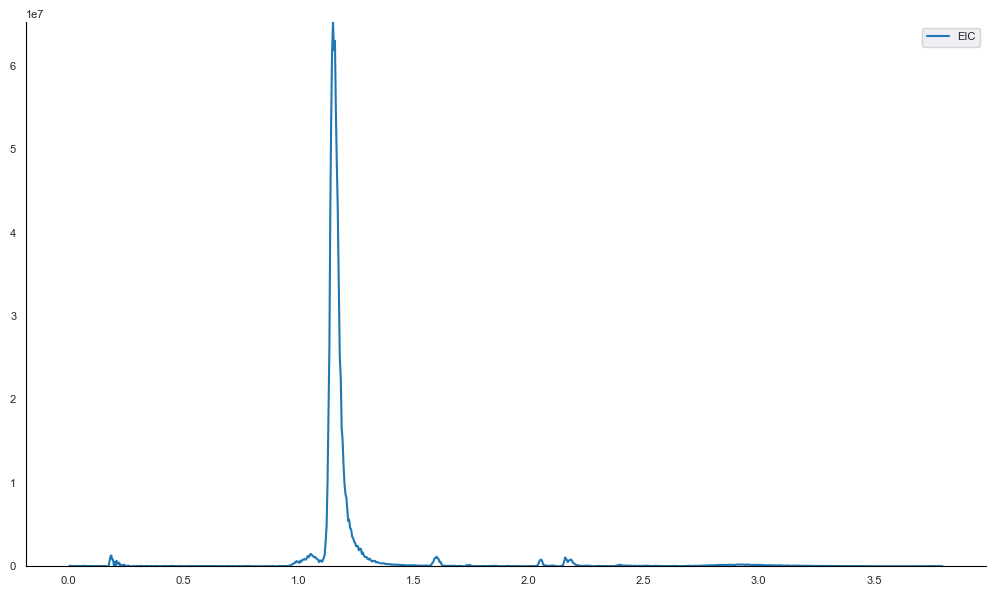

In [97]:
rt_list, intensity_list = get_EIC_list(ms1, 85.132362, step=0.5)
EIC(rt_list, intensity_list)

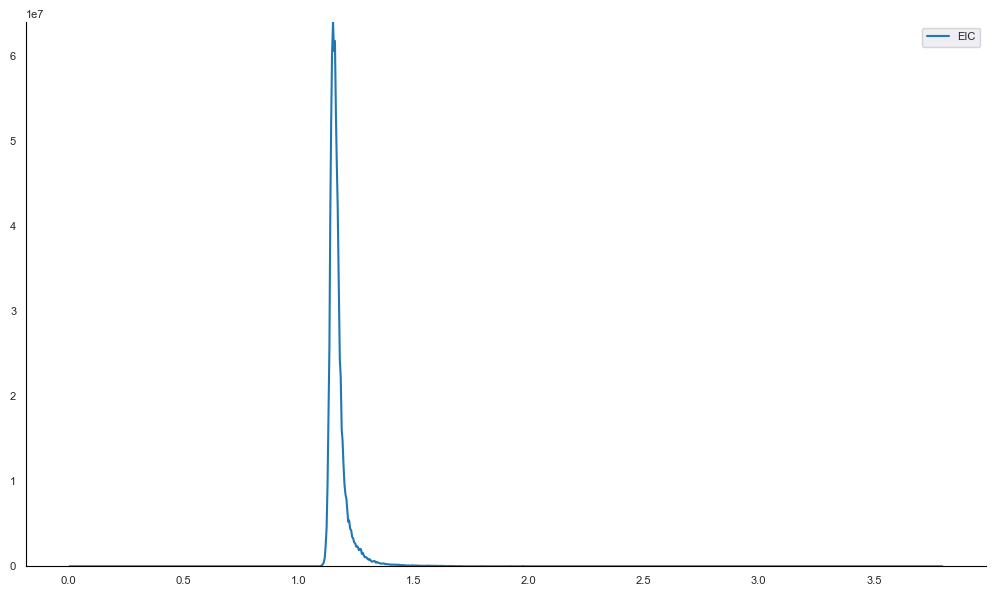

In [98]:
rt_list, intensity_list = get_EIC_list(ms1, 85.132362, step=0.005)
EIC(rt_list, intensity_list)

In [28]:
mass = []
intensity =[]
for index, row in ms1.iterrows():
    mass_temp, intensity_temp = so.break_spectra(row['peaks'])
    mass.extend(mass_temp)
    intensity.extend(intensity_temp)

In [33]:
seed_idx = np.argmax(intensity_sorted)


In [35]:
seed_idx

288913

In [37]:
mass_sorted[seed_idx]

180.1211395263672

In [75]:
mass_slice = mass[0:100]

In [122]:
import time

In [171]:
def get_ion_trace_debug(mass, intensity, tolerance = 0.005):
    mass_sorted, intensity_sorted = zip(*sorted(zip(mass, intensity)))
    ion_trace = []
    start_point = time.time()
    seed_idx = np.argmax(intensity_sorted)
    point1 = time.time()
    seed_mass = mass_sorted[seed_idx]
    ion_trace.append(seed_mass)
    point2= time.time()
    value_start = seed_mass-tolerance
    value_end = seed_mass+tolerance
    point3 = time.time()
    idx_start, idx_end = np.searchsorted(mass_sorted, [value_start, value_end])
    # idx_end = np.searchsorted(mass_sorted, value_end,side = 'right')
    point4 = time.time()
    # mass_extracted = mass_sorted[idx_start:idx_end]
    point5 = time.time()
    mass_sorted = mass_sorted[0:idx_start]+mass_sorted[idx_end:]
    intensity_sorted = intensity_sorted[0:idx_start]+intensity_sorted[idx_end:]
    point6 = time.time()


        # print(len(mass_sorted))
    return(start_point, point1, point2, point3, point4, point5, point6)
def get_ion_trace(mass, intensity, tolerance = 0.005):
    mass_sorted, intensity_sorted = zip(*sorted(zip(mass, intensity)))
    ion_trace = []
    while(len(mass_sorted)>0):
    # start_point = time.time()
        seed_idx = np.argmax(intensity_sorted)
        # point1 = time.time()
        seed_mass = mass_sorted[seed_idx]
        ion_trace.append(seed_mass)
        # point2= time.time()
        value_start = seed_mass-tolerance
        value_end = seed_mass+tolerance
        # point3 = time.time()
        idx_start, idx_end = np.searchsorted(mass_sorted, [value_start, value_end])
        # idx_end = np.searchsorted(mass_sorted, value_end,side = 'right')
        # point4 = time.time()
        # mass_extracted = mass_sorted[idx_start:idx_end]
        # point5 = time.time()
        mass_sorted = mass_sorted[0:idx_start]+mass_sorted[idx_end:]
        intensity_sorted = intensity_sorted[0:idx_start]+intensity_sorted[idx_end:]
    # point6 = time.time()


    # print(len(mass_sorted))
    return(ion_trace)
def get_ion_trace_df(mass, intensity):
    ion_trace_df = pd.DataFrame(zip(mass, intensity), columns=['mass', 'intensity'])
    ion_trace_df.sort_values(by = 'mass', ascending=True, inplace=True)
    bins = []
    while len(ion_trace_df)>0:
        current_cluster = quick_search_sorted(ion_trace_df, 'mass', value_start=ion_trace_df.iloc[np.argmax(ion_trace_df['intensity'])]['mass']-0.005,
                                              value_end=ion_trace_df.iloc[np.argmax(ion_trace_df['intensity'])]['mass']+0.005)
        bins.append(current_cluster.iloc[np.argmax(current_cluster['intensity'])]['mass'])
        # current_cluster = num_search(ms2_working, 'precursor_mz', ms2_working.iloc[np.argmax(ms2_working['ms1_precursor_intensity'])]['precursor_mz'], direction='between', step=0.005, inclusion=True)
        ion_trace_df.drop(current_cluster.index, inplace=True)
    return(bins)

In [172]:
start = time.time()

t = get_ion_trace(mass, intensity, tolerance = 0.005)
end = time.time()
print((end-start))

134.50063610076904


In [167]:
len(tt)

32678

In [161]:
idx_start, idx_end = np.searchsorted(mass, [80.02437591552734-0.005, 80.02437591552734+0.005])

In [162]:
idx_start

3

In [160]:
80.02437591552734-0.005

80.01937591552735

In [159]:
mass[0:3]

[79.99992370605469, 80.00228881835938, 80.01351165771484]

In [158]:
mass[3:13]

[80.02198028564453,
 80.02314758300781,
 80.02437591552734,
 80.02449798583984,
 80.02456665039062,
 80.02460479736328,
 80.0246353149414,
 80.02470397949219,
 80.02622985839844,
 80.026611328125]

28377988.805270817

In [120]:
s2 = time()

In [121]:
s2-s1

2.016652822494507

In [85]:
start = time.time()
tt = get_ion_trace_df(mass, intensity)
end = time.time()
print((end-start)/60)

1.1972052812576295


In [103]:
start = time.time()

AttributeError: 'tuple' object has no attribute 'time'

In [87]:
len(ion_traces_all)

32678

In [52]:
tt[0]-180.121625

-0.00048547363280704303

In [ ]:
tt[0]-

In [41]:
rt_list, intensity_list = get_EIC_list(ms1, tt[0])

In [44]:
peaks = get_peaks(intensity_list)

In [48]:
np.argmax(intensity_list)

60

In [51]:
rt_list[75]

0.32639036

In [54]:
ms2

,scan_idx,cycle,ms_level,precursor_mz,charge,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
0,1532,510,2,84.044535,1,2.179297,70.03838348388672\t2118.0224609375\n84.0445175...,"(83.544532775879, 84.544532775879)",84.044571,2.174278,3.122020e+06,0.948551,0.000036,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1,1693,564,2,84.080942,1,2.408015,67.05448913574219\t8925.4775390625\n82.0649490...,"(83.580940246582, 84.580940246582)",84.080986,2.405820,1.665078e+06,0.905353,0.000044,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
2,1121,373,2,84.911423,1,1.607826,66.1156005859375\t12224.4501953125\n68.1296615...,"(84.411422729492, 85.411422729492)",84.911430,1.603982,9.098159e+05,0.945485,0.000008,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
3,788,262,2,85.132378,1,1.130146,66.10527038574219\t27666.376953125\n66.1068420...,"(84.632377624512, 85.632377624512)",85.132362,1.126835,9.730859e+06,0.956717,0.000015,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
4,818,272,2,85.132362,1,1.170141,64.92672729492188\t35700.0\n66.1048812866211\t...,"(84.632362365723, 85.632362365723)",85.132370,1.167083,4.567197e+07,0.947367,0.000008,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,137,45,2,790.380167,1,0.213685,61.02862548828125\t34443.98046875\n69.03365325...,"(789.880187988281, 790.880187988281)",790.380493,0.210337,1.836062e+07,1.000000,0.000327,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1724,187,62,2,817.582926,1,0.276779,64.02779388427734\t87841.9921875\n77.122894287...,"(817.082946777344, 818.082946777344)",817.582947,0.274555,1.381094e+08,0.997949,0.000021,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1725,293,97,2,817.583493,1,0.423090,67.0545425415039\t11491.2685546875\n77.3665542...,"(817.08349609375, 818.08349609375)",817.583313,0.419844,1.003972e+07,1.000000,0.000180,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML
1726,188,62,2,834.609487,1,0.277456,69.23934173583984\t86629.6953125\n86.682929992...,"(834.109497070313, 835.109497070313)",834.609375,0.274555,1.240460e+08,0.993788,0.000112,PoolQC080_MX741718_posBA_postSchebesta0781.mzML,PoolQC080_MX741718_posBA_postSchebesta0781.mzML


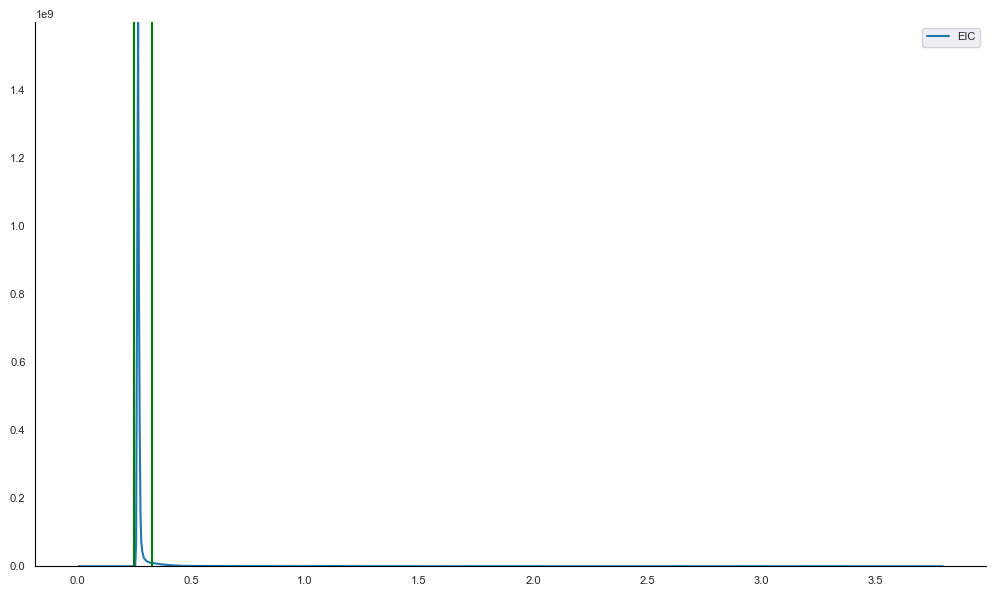

In [50]:
EIC(rt_list, intensity_list, vlines_location_2=[rt_list[55], rt_list[75]], )

In [49]:
peaks

[(1, 2, 4),
 (4, 6, 7),
 (7, 8, 9),
 (9, 11, 14),
 (14, 15, 16),
 (16, 19, 22),
 (22, 24, 25),
 (25, 26, 27),
 (27, 29, 32),
 (32, 34, 35),
 (52, 53, 54),
 (55, 60, 75),
 (75, 76, 78),
 (78, 79, 80),
 (80, 81, 86),
 (86, 87, 89),
 (89, 90, 94),
 (94, 95, 99),
 (99, 100, 101),
 (101, 102, 103),
 (103, 104, 105),
 (105, 106, 107),
 (107, 108, 110),
 (110, 111, 112),
 (112, 114, 115),
 (115, 116, 117),
 (117, 118, 120),
 (120, 121, 122),
 (122, 125, 127),
 (127, 128, 130),
 (130, 131, 132),
 (132, 133, 134),
 (134, 135, 138),
 (138, 139, 141),
 (141, 143, 145),
 (145, 146, 148),
 (148, 149, 150),
 (150, 151, 154),
 (154, 155, 156),
 (156, 157, 160),
 (160, 162, 164),
 (164, 165, 166),
 (166, 167, 168),
 (168, 169, 171),
 (171, 172, 175),
 (175, 177, 178),
 (178, 179, 180),
 (180, 181, 183),
 (183, 184, 185),
 (185, 187, 189),
 (189, 190, 191),
 (191, 195, 197),
 (197, 199, 200),
 (200, 204, 205),
 (205, 206, 207),
 (207, 208, 210),
 (210, 211, 212),
 (212, 213, 214),
 (214, 215, 217),
 (2